In [ ]:
pip install yfinance

In [ ]:
pip install matplotlib

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [7]:
start_date='2022-09-01'
end_date='2022-10-07'
ticker=['AAPL','ABT']

In [8]:
data=yf.download(ticker,start=start_date,end=end_date)

[*********************100%***********************]  2 of 2 completed


In [9]:
data.head()

Adj Close                   Close              \
                                 AAPL         ABT        AAPL         ABT   
Date                                                                        
2022-09-01 00:00:00-04:00  157.960007  104.839996  157.960007  104.839996   
2022-09-02 00:00:00-04:00  155.809998  102.500000  155.809998  102.500000   
2022-09-06 00:00:00-04:00  154.529999  102.709999  154.529999  102.709999   
2022-09-07 00:00:00-04:00  155.960007  104.699997  155.960007  104.699997   
2022-09-08 00:00:00-04:00  154.460007  106.989998  154.460007  106.989998   

                                 High                     Low              \
                                 AAPL         ABT        AAPL         ABT   
Date                                                                        
2022-09-01 00:00:00-04:00  158.419998  104.900002  154.669998  102.029999   
2022-09-02 00:00:00-04:00  160.360001  105.650002  154.970001  101.980003   
2022-09-06 00:00:00-04:00  157.089996  103.930000  153.690002  102.239998   
2022-09-07 00:00:00-04:00  156.669998  104.970001  153.610001  102.739998   
2022-09-08 00:00:00-04:00  156.360001  107.570000  152.679993  103.589996   

                                 Open                Volume           
                                 AAPL         ABT      AAPL      ABT  
Date                                                                  
2022-09-01 00:00:00-04:00  156.639999  102.360001  74229900  4397900  
2022-09-02 00:00:00-04:00  159.750000  105.449997  76905200  4103200  
2022-09-06 00:00:00-04:00  156.470001  102.500000  73714800  4670400  
2022-09-07 00:00:00-04:00  154.820007  102.879997  87449600  5100800  
2022-09-08 00:00:00-04:00  154.639999  103.629997  84923800  8700700

data.to_csv('stock_data.csv')

In [ ]:
data.to_csv('stock_data.csv')

In [10]:
#making multiple index to single index
data.columns=data.columns.to_flat_index()

In [13]:
#tuple to multiindex
data.columns=pd.MultiIndex.from_tuples(data.columns)

In [15]:
close=data.loc[:,'Close'].copy()

In [ ]:
close

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

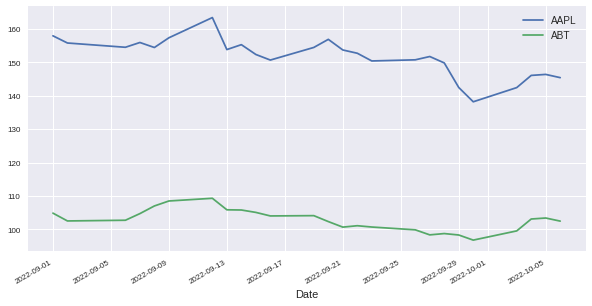

In [19]:
close.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()

In [20]:
close.iloc[0,0]

157.9600067138672

In [21]:
close.AAPL.div(close.iloc[0,0])

Date
2022-09-01 00:00:00-04:00    1.000000
2022-09-02 00:00:00-04:00    0.986389
2022-09-06 00:00:00-04:00    0.978286
2022-09-07 00:00:00-04:00    0.987339
2022-09-08 00:00:00-04:00    0.977842
2022-09-09 00:00:00-04:00    0.996265
2022-09-12 00:00:00-04:00    1.034629
2022-09-13 00:00:00-04:00    0.973917
2022-09-14 00:00:00-04:00    0.983224
2022-09-15 00:00:00-04:00    0.964611
2022-09-16 00:00:00-04:00    0.954039
2022-09-19 00:00:00-04:00    0.977969
2022-09-20 00:00:00-04:00    0.993289
2022-09-21 00:00:00-04:00    0.973158
2022-09-22 00:00:00-04:00    0.966954
2022-09-23 00:00:00-04:00    0.952330
2022-09-26 00:00:00-04:00    0.954482
2022-09-27 00:00:00-04:00    0.960749
2022-09-28 00:00:00-04:00    0.948595
2022-09-29 00:00:00-04:00    0.902000
2022-09-30 00:00:00-04:00    0.874905
2022-10-03 00:00:00-04:00    0.901811
2022-10-04 00:00:00-04:00    0.924918
2022-10-05 00:00:00-04:00    0.926817
2022-10-06 00:00:00-04:00    0.920676
Name: AAPL, dtype: float64

In [24]:
normclose=close.div(close.iloc[0]).mul(100)

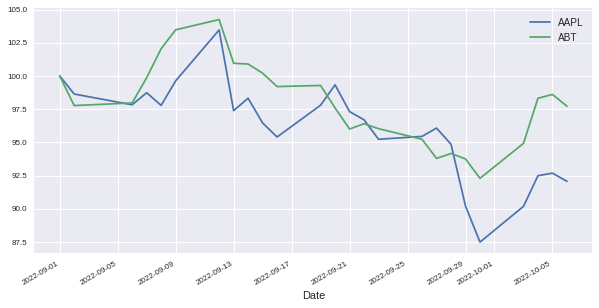

In [25]:
normclose.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()